In [1]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import warnings 
import matplotlib.gridspec as gridspec
warnings.filterwarnings(action= 'ignore')
import matplotlib.cm as cm
import tensorflow as tf
from sklearn.metrics import f1_score 
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Dropout, Conv2D, Activation
from tensorflow.keras.models import model_from_json
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.backend as K
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler
import os
from skimage.transform import resize
from skimage.io import imread

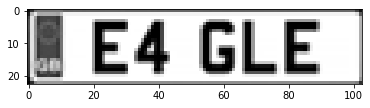

In [2]:
img = cv2.imread('test/Cropped_1.png', 0)
plt.imshow(img,cmap='gray')

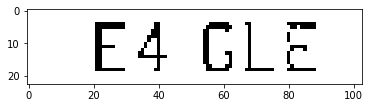

In [3]:
plate_image = cv2.convertScaleAbs(img, alpha=(255.0))
plt.imshow(plate_image,cmap='gray')

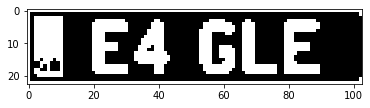

In [4]:
binary = cv2.threshold(img, 180, 255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
plt.imshow(binary,cmap='gray')

In [5]:
def sort_contours(cnts,reverse = False):
        i = 0
        boundingBoxes = [cv2.boundingRect(c) for c in cnts]
        (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),key=lambda b: b[1][i], reverse=reverse))
        return cnts

cont, _  = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
test_roi = plate_image.copy()
    # Initialize a list which will be used to append charater image
crop_characters = []
# define standard width and height of character
digit_w, digit_h = 30, 60
for c in sort_contours(cont):
    (x, y, w, h) = cv2.boundingRect(c)
    ratio = h/w
    if 1<=ratio<=3.5: # Only select contour with defined ratio
        if h/plate_image.shape[0]>=0.5: # Select contour which has the height larger than 50% of the plate
            # Draw bounding box arroung digit number
            cv2.rectangle(test_roi, (x, y), (x + w, y + h), (0, 255,0), 2)
            # Sperate number and gibe prediction
            curr_num = binary[y:y+h,x:x+w]
            curr_num = cv2.resize(curr_num, dsize=(digit_w, digit_h))
            _, curr_num = cv2.threshold(curr_num, 220, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
            crop_characters.append(curr_num)   

In [6]:
Categories=['0', '1', '2', '3', '4', '5',
            '6', '7', '8', '9', 'A', 'B',
            'C', 'D', 'E', 'F', 'G', 'H',
            'I', 'J', 'K', 'L', 'M', 'N',
            'O', 'P', 'Q', 'R', 'S', 'T',
            'U', 'V', 'W', 'X', 'Y', 'Z']

In [7]:
def load_keras_model(model_name):
    # Load json and create model
        json_file = open('./{}.json'.format(model_name), 'r')
        loaded_model_json = json_file.read()
        json_file.close()
        model = model_from_json(loaded_model_json)
        # Load weights into new model
        model.load_weights("./{}.h5".format(model_name))
        return model  
    
# store_keras_model(model, 'model_License_Plate')
pre_trained_model = load_keras_model('model_License_Plate')
model = pre_trained_model
output = []

In [8]:
def fix_dimension(img):
    new_img = np.zeros((28,28,3))
    for i in range(3):
        new_img[:,:,i] = img 
    return new_img


In [9]:
for i,ch in enumerate(crop_characters): #iterating over the characters
    img_ = cv2.resize(ch, (28,28), interpolation=cv2.INTER_AREA)
    img = fix_dimension(img_)
    img = img.reshape(1,28,28,3) #preparing image for the model
    y_ = model.predict_classes(img)[0] #predicting the class
    character = Categories[y_] #
    output.append(character) #storing the result in a list

plate_number = ''.join(output)

In [10]:
print(plate_number)

WE46LE


In [11]:
print(output)

['W', 'E', '4', '6', 'L', 'E']


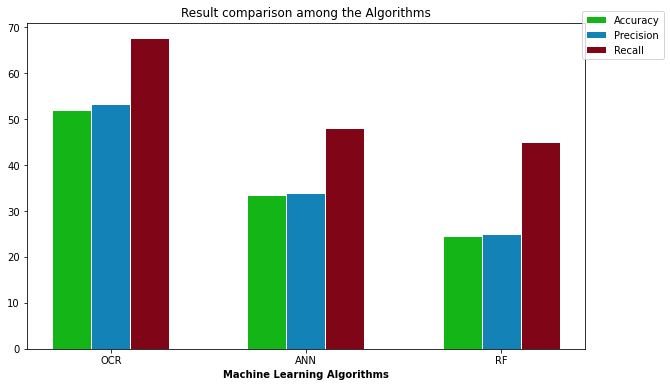

In [6]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.20
# set height of bar
accuracy = [52.01,33.51,24.54]
precision = [53.23,33.98,24.96]
recall = [67.6,48.04,44.98]

# Set position of bar on X axis
r1 = np.arange(len(accuracy))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, accuracy, color='#13B616', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='#1382B6', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, recall, color='#800517', width=barWidth, edgecolor='white', label='Recall')

# Add xticks on the middle of the group bars
plt.xlabel('Machine Learning Algorithms', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(accuracy))], ['OCR', 'ANN', 'RF'])
plt.title("Result comparison among the Algorithms",fontweight=30)
plt.rcParams['figure.figsize'] = (10,6 )

# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1.15, 1.05))
plt.show()

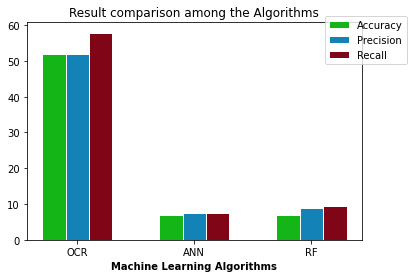

In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.20
# set height of bar
accuracy = [52.01,6.92,6.88]
precision = [51.98,7.36,8.83]
recall = [57.89,7.47,9.35]

# Set position of bar on X axis
r1 = np.arange(len(accuracy))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, accuracy, color='#13B616', width=barWidth, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='#1382B6', width=barWidth, edgecolor='white', label='Precision')
plt.bar(r3, recall, color='#800517', width=barWidth, edgecolor='white', label='Recall')

# Add xticks on the middle of the group bars
plt.xlabel('Machine Learning Algorithms', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(accuracy))], ['OCR', 'ANN', 'RF'])
plt.title("Result comparison among the Algorithms",fontweight=30)
plt.rcParams['figure.figsize'] = (10,6 )

# Create legend & Show graphic
plt.legend(bbox_to_anchor=(1.15, 1.05))
plt.show()